# H8.1

 The sums of the binomial coefficients is $\sum_{k=0}^N {N\choose k}=2^N$
 
 $C_{N+1,N}= 2\sum_{k=0}^N {N\choose k}=2^{N+1}$
 
 $C_{N+2,N}= C_{N+1,N}+ C_{N+1,N-1} = 2^{N+1} + 2\sum_{k=1}^N {N\choose k} \leq 2^{N+1} + 2^{N+1} = 2^{N+2}$
 


# H8.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.pyplot as plt

# (a)

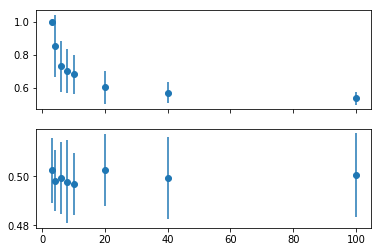

In [70]:
mu = [(0,1),(1,0)]
cov = [[2,0],[0,2]]
N = [3,4,6,8,10,20,40,100]
train_mean,train_std = [],[]
test_mean,test_std = [],[]
w0_mean, w1_mean, w2_mean = [], [], []
w0_s, w1_s, w2_s = [], [], []
for i in N:
    if i == 3:
        n1, n2 = 1,2
    else:
        n1 = n2 = int(i/2)
    train_smean = []
    test_smean = []
    w0, w1, w2 = [], [], []
    for _ in range(50):
        x1 = np.random.multivariate_normal(mu[0],cov,n1)
        x2 = np.random.multivariate_normal(mu[0],cov,n2)
        x = np.concatenate((x1, x2), axis=0)
        one = np.array([1]*i).reshape(i,1)
        x = np.append(one,x,axis=1)
        x = np.transpose(x)
        y = np.concatenate(([1]*n1, [-1]*n2), axis=0)
        y = y.reshape(1,i)
        w = np.dot(np.dot(inv(np.dot(x,np.transpose(x))),x),np.transpose(y))
        train_predict = np.dot(np.transpose(w),x)
        count = 0
        for j in range(i):
            
            if(train_predict[0,j]>0 and y[0,j]>0):
                count = count + 1
            elif(train_predict[0,j]<0 and y[0,j]<0):
                count = count + 1
        train_smean.append(count/i)
        w0.append(w[0,0])
        w1.append(w[1,0])
        w2.append(w[2,0])
        x1 = np.random.multivariate_normal(mu[0],cov,500)
        x2 = np.random.multivariate_normal(mu[0],cov,500)
        x = np.concatenate((x1, x2), axis=0)
        one = np.array([1]*1000).reshape(1000,1)
        x = np.append(one,x,axis=1)
        x = np.transpose(x)
        y =np.concatenate(([1]*500, [-1]*500), axis=0).reshape(1,1000)
        y = y.reshape(1,1000)
        test_predict = np.dot(np.transpose(w),x)
        count = 0
        for j in range(1000):
            
            if(test_predict[0,j]>0 and y[0,j]>0):
                count = count + 1
            elif(test_predict[0,j]<0 and y[0,j]<0):
                count = count + 1
        test_smean.append(count/1000)
        
    train_mean.append(np.mean(train_smean))
    test_mean.append(np.mean(test_smean))
    w0_mean.append(np.mean(w0))
    w1_mean.append(np.mean(w1))
    w2_mean.append(np.mean(w2))
    
    train_std.append(np.std(train_smean))
    test_std.append(np.std(test_smean))
    w0_s.append(np.std(w0))
    w1_s.append(np.std(w1))
    w2_s.append(np.std(w2))
    
    
f, (ax1, ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(N, train_mean, yerr=train_std, fmt='o')
ax2.errorbar(N, test_mean, yerr=test_std, fmt='o')
plt.show()       

# (b)

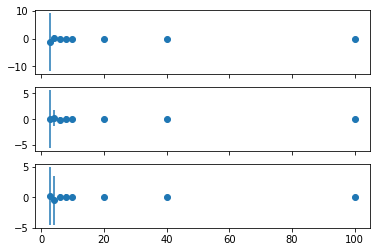

In [71]:
f, (ax1, ax2,ax3) = plt.subplots(3,sharex=True)
ax1.errorbar(N, w0_mean, yerr=w0_s, fmt='o')
ax2.errorbar(N, w1_mean, yerr=w1_s, fmt='o')
ax3.errorbar(N, w2_mean, yerr=w2_s, fmt='o')
plt.show()  

# (c)

How do these estimates depend on N?

With the increasing number of samples, the training accuracy dropped significantly. But the testing accuracy fluctuated around 0.5.

weight1 and weight2 converge



# H8.3

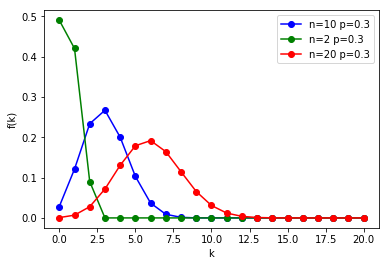

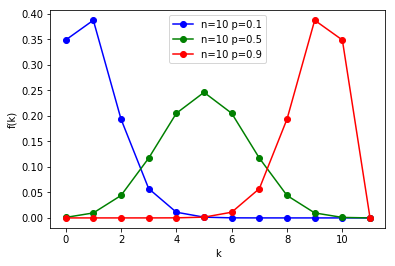

In [1]:
import scipy, scipy.stats
import pylab
import numpy as np
import matplotlib.pyplot as plt

#fix p and change n
n=10
p=0.3
k=np.arange(0,21)
b1=scipy.stats.binom.pmf(k,n,p)
b2=scipy.stats.binom.pmf(k,2,0.3)
b3=scipy.stats.binom.pmf(k,20,0.3)
plt.plot(k,b1,'o-',color='blue',label='n=10 p=0.3')
plt.plot(k,b2,'o-',color='green',label='n=2 p=0.3')
plt.plot(k,b3,'o-',color='red',label='n=20 p=0.3')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()

#fix n and change p
n=10
p=0.1
k=np.arange(0,12)
b1=scipy.stats.binom.pmf(k,n,p)
b2=scipy.stats.binom.pmf(k,10,0.5)
b3=scipy.stats.binom.pmf(k,10,0.9)
plt.plot(k,b1,'o-',color='blue',label='n=10 p=0.1')
plt.plot(k,b2,'o-',color='green',label='n=10 p=0.5')
plt.plot(k,b3,'o-',color='red',label='n=10 p=0.9')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()


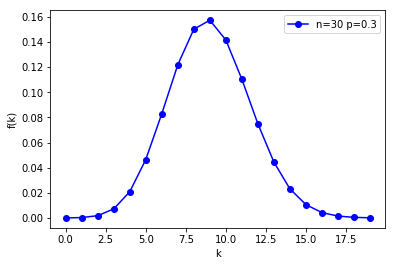

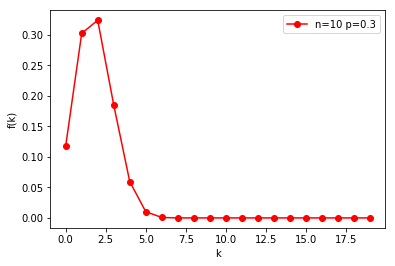

In [2]:
# if n approach to large , and np>=5  n(1-p)>=5  => The normal distribution is approximation to the binomial distribution.

#good example
# if np>=5 and n(1-p)>=5, it can approach by normal distribution
n=30
p=0.3
k=np.arange(0,20)
b1=scipy.stats.binom.pmf(k,n,p)
plt.plot(k,b1,'o-',color='blue',label='n=30 p=0.3')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()


#bad example
# if np>=5  and n(1-p)>=5 are are not satisfied , so it can not approach by normal distribution
n=6
p=0.3
k=np.arange(0,20)
b1=scipy.stats.binom.pmf(k,n,p)
plt.plot(k,b1,'o-',color='red',label='n=10 p=0.3')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()

#why this distribution is so widely used?
#Because the probability distribution of many continuous random variables is often the normal distribution

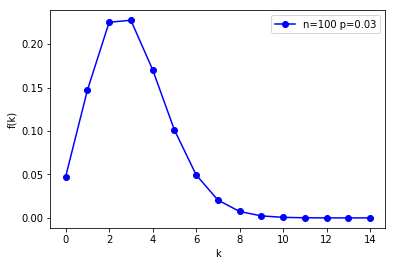

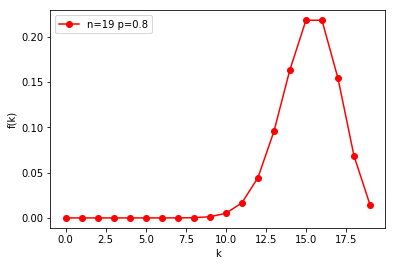

In [3]:
#condition: np < 10 n>=20 p<=0.05

#good example
# if np < 10 n>=20 p<=0.05, it can approach by Poisson distribution
n=100
p=0.03
k=np.arange(0,15)
b1=scipy.stats.binom.pmf(k,n,p)
plt.plot(k,b1,'o-',color='blue',label='n=100 p=0.03')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()


#bad example
# if not satisfied with np < 10 n>=20 p<=0.05 , it can not approach by Poisson distribution
n=19
p=0.8
k=np.arange(0,20)
b1=scipy.stats.binom.pmf(k,n,p)
plt.plot(k,b1,'o-',color='red',label='n=19 p=0.8')
plt.legend()
plt.ylabel('f(k)')
plt.xlabel('k')
plt.show()
